In [1]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load sentiment analysis pipeline (RoBERTa, 3 classes: negative/neutral/positive)
sentiment_analyzer = pipeline(
    task="sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

# Sanity check
sentiment_analyzer("This demo is working great!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'LABEL_2', 'score': 0.9876981377601624}]

In [7]:
# Eval dataset to test RoBERTa and compute metrics.
# Labels: LABEL_0=Negative, LABEL_1=Neutral, LABEL_2=Positive.
texts = [
    "I love this product!", "This is the worst experience.", "It was okay, nothing special.",
    "Absolutely fantastic service.", "I really dislike the taste.", "Not bad, could be better.",
    "Best day ever!", "This ruined my evening.", "It’s fine, nothing remarkable.",
    "Super happy with the results!", "Awful design and poor quality.", "Average experience overall.",
    "I’m thrilled with this choice.", "Totally disappointed.", "It met my expectations.",
    "Exceeded what I hoped for!", "Would not recommend at all.", "It’s decent, not the best.",
    "Perfect in every way!", "Completely useless.", "Works as intended.",
    "Highly recommended!", "I regret buying this.", "Neutral about this one.",
    "This made my day!", "Waste of money.", "It’s acceptable.",
    "I couldn’t be happier.", "Extremely frustrating.", "Just okay.",
    "This is amazing!", "Terrible outcome.", "Nothing to complain about.",
    "So much fun to use.", "It broke right away.", "It does the job.",
    "Outstanding effort!", "Not worth the price.", "Neither good nor bad.",
    "Incredible quality!", "Worst purchase ever.", "I feel indifferent.",
    "This app is brilliant!", "Completely dissatisfied.", "It’s manageable.",
    "Delighted with this item.", "I hate it.", "It’s average.",
    "I’m so impressed.", "Awful decision.", "Not terrible, not great.",
    "It made me smile.", "Horrible packaging.", "It’s satisfactory.",
    "Wonderful upgrade!", "Bad experience overall.", "It’s okay.",
    "Couldn’t ask for more.", "Very disappointing.", "Neither here nor there.",
    "Truly excellent.", "Pathetic quality.", "Nothing extraordinary.",
    "I enjoyed every moment.", "Worst thing so far.", "It’s passable.",
    "Superb product.", "I don’t like this.", "It’s fine.",
    "Top-notch experience!", "Horrible mistake.", "Mediocre outcome.",
    "Simply perfect.", "Disgusting taste.", "So-so service.",
    "Very satisfied.", "Completely failed me.", "It’s alright.",
    "Impressive results.", "Not acceptable.", "Plain and ordinary.",
    "Really great quality.", "I wish I hadn’t bought this.", "It’s tolerable.",
    "Best choice ever.", "I’m angry with this.", "It’s normal.",
    "Couldn’t be better.", "Biggest regret.", "I’m neutral.",
    "I feel great about this.", "Worst ever.", "This is typical.",
    "Outstanding job!", "Pathetic results.", "Average at best."
]

true_labels = [
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1",
    "LABEL_2","LABEL_0","LABEL_1"
]


In [8]:
from tqdm import tqdm

pred_labels = []
for text in tqdm(texts):
    result = sentiment_analyzer(text)[0]['label']
    pred_labels.append(result)


100%|██████████| 96/96 [00:14<00:00,  6.46it/s]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.80
Precision: 0.83
Recall: 0.80
F1 Score: 0.78


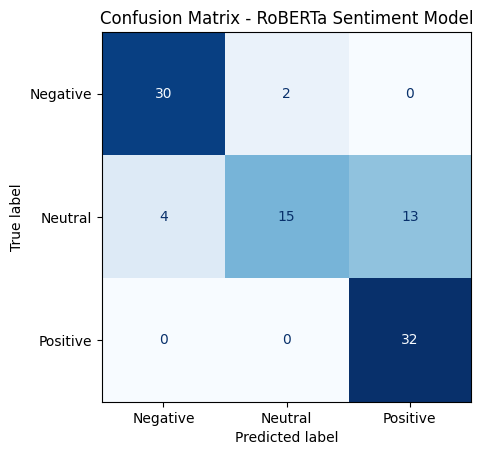

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels, labels=["LABEL_0", "LABEL_1", "LABEL_2"])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Negative", "Neutral", "Positive"]
)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title("Confusion Matrix - RoBERTa Sentiment Model")
plt.show()



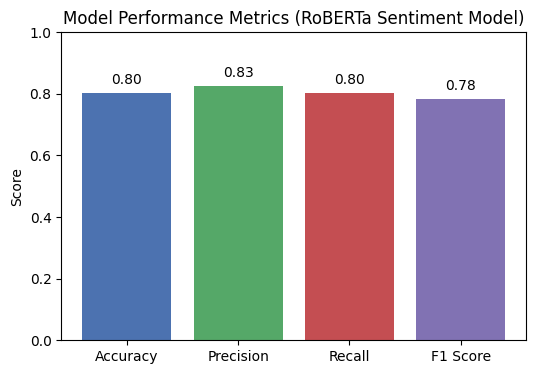

In [13]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(6,4))
bars = plt.bar(metrics, scores, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
plt.ylim(0, 1)
plt.title("Model Performance Metrics (RoBERTa Sentiment Model)")
plt.ylabel("Score")

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.show()


In [14]:
for text, pred in zip(texts[:10], pred_labels[:10]):
    sentiment = "Positive" if pred == "LABEL_2" else "Neutral" if pred == "LABEL_1" else "Negative"
    print(f"Sentence: {text}\nPredicted Sentiment: {sentiment}\n{'-'*60}")


Sentence: I love this product!
Predicted Sentiment: Positive
------------------------------------------------------------
Sentence: This is the worst experience.
Predicted Sentiment: Negative
------------------------------------------------------------
Sentence: It was okay, nothing special.
Predicted Sentiment: Positive
------------------------------------------------------------
Sentence: Absolutely fantastic service.
Predicted Sentiment: Positive
------------------------------------------------------------
Sentence: I really dislike the taste.
Predicted Sentiment: Negative
------------------------------------------------------------
Sentence: Not bad, could be better.
Predicted Sentiment: Positive
------------------------------------------------------------
Sentence: Best day ever!
Predicted Sentiment: Positive
------------------------------------------------------------
Sentence: This ruined my evening.
Predicted Sentiment: Negative
-------------------------------------------------

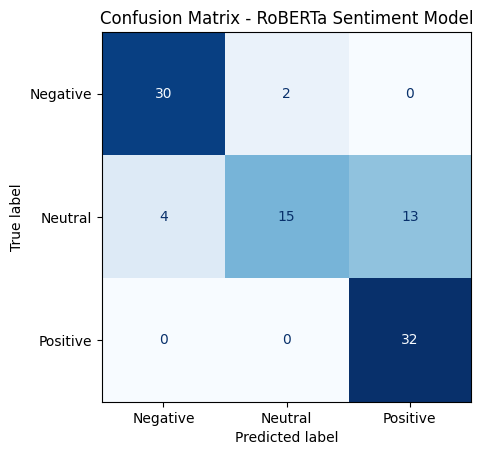

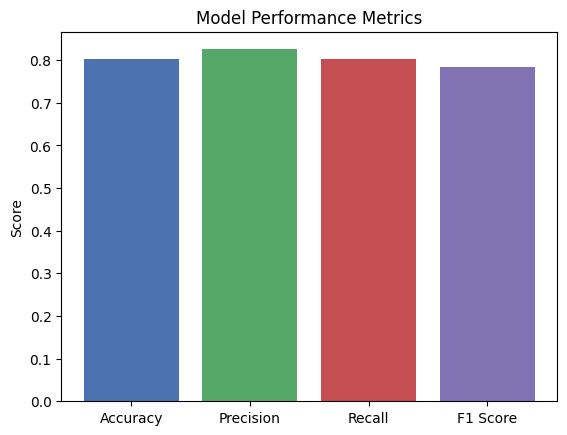

In [15]:
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title("Confusion Matrix - RoBERTa Sentiment Model")
plt.savefig("confusion_matrix.png", bbox_inches='tight', dpi=300)

plt.figure()
plt.bar(metrics, scores, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.savefig("performance_metrics.png", bbox_inches='tight', dpi=300)


In [16]:
# Define RGB colors for each sentiment
rgb_mapping = {
    "LABEL_0": (255, 99, 71),     # Negative → Tomato Red
    "LABEL_1": (128, 128, 128),   # Neutral  → Gray
    "LABEL_2": (60, 179, 113)     # Positive → Medium Sea Green
}

# Optional: for your presentation, map to readable names
label_names = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

print("Sentiment RGB Mapping:")
for k, v in rgb_mapping.items():
    print(f"{label_names[k]} → RGB{v}")


Sentiment RGB Mapping:
Negative → RGB(255, 99, 71)
Neutral → RGB(128, 128, 128)
Positive → RGB(60, 179, 113)


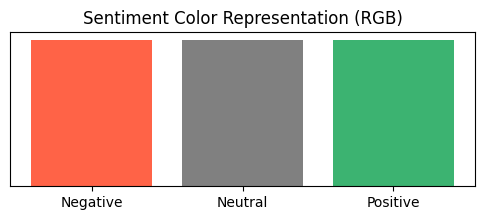

In [17]:
import matplotlib.pyplot as plt

# Colors in order: Negative, Neutral, Positive
colors = [(255/255, 99/255, 71/255), (128/255, 128/255, 128/255), (60/255, 179/255, 113/255)]
labels = ["Negative", "Neutral", "Positive"]

plt.figure(figsize=(6,2))
for i, color in enumerate(colors):
    plt.bar(i, 1, color=color)
plt.xticks(range(3), labels)
plt.yticks([])
plt.title("Sentiment Color Representation (RGB)")
plt.show()


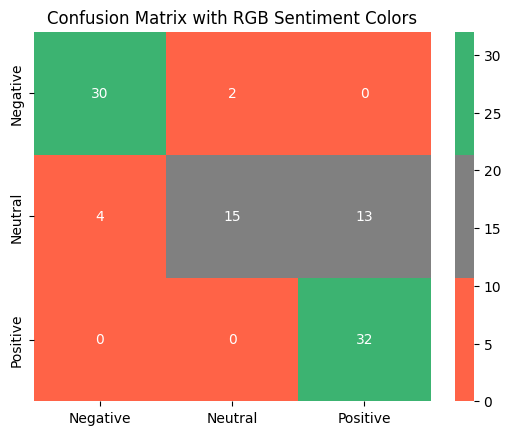

In [18]:
import seaborn as sns
import pandas as pd

cm_df = pd.DataFrame(cm, index=["Negative", "Neutral", "Positive"], columns=["Negative", "Neutral", "Positive"])

sns.heatmap(cm_df, annot=True, fmt="d", cmap=sns.color_palette(["#ff6347", "#808080", "#3cb371"]))
plt.title("Confusion Matrix with RGB Sentiment Colors")
plt.show()


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad text sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert each text to a sequence of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to equal length
padded = pad_sequences(sequences, maxlen=20, padding='post', truncating='post')

print("Example padded sequence:")
print(padded[0])
print("Shape:", padded.shape)


Example padded sequence:
[ 3 59  2 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Shape: (96, 20)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(76, 20) (20, 20) (76,) (20,)


In [25]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=20),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 sentiment classes
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(input_shape=(None, 20))
model.summary()

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,203 (1.35 MB)

 Trainable params: 355,203 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,203 (1.35 MB)

 Trainable params: 355,203 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=8,
    verbose=1
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.1549 - loss: 1.1054 - val_accuracy: 0.2500 - val_loss: 1.1004
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1881 - loss: 1.1026 - val_accuracy: 0.2500 - val_loss: 1.0999
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3663 - loss: 1.0980 - val_accuracy: 0.2500 - val_loss: 1.0986
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3457 - loss: 1.1010 - val_accuracy: 0.2500 - val_loss: 1.1065
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2819 - loss: 1.1004 - val_accuracy: 0.2500 - val_loss: 1.1081
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2879 - loss: 1.1019 - val_accuracy: 0.2500 - val_loss: 1.1068
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3386 - loss: 1.0977 - val_accuracy: 0.2500 - val_loss: 1.1092
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3011 - loss: 1.1023 - val_accuracy: 0.2500 - val_loss: 1.110

In [27]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))


Test Accuracy: 0.35
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         9
     Neutral       0.00      0.00      0.00         4
    Positive       0.35      1.00      0.52         7

    accuracy                           0.35        20
   macro avg       0.12      0.33      0.17        20
weighted avg       0.12      0.35      0.18        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


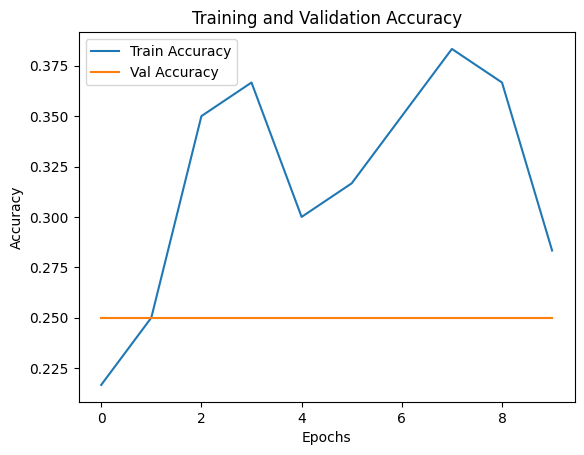

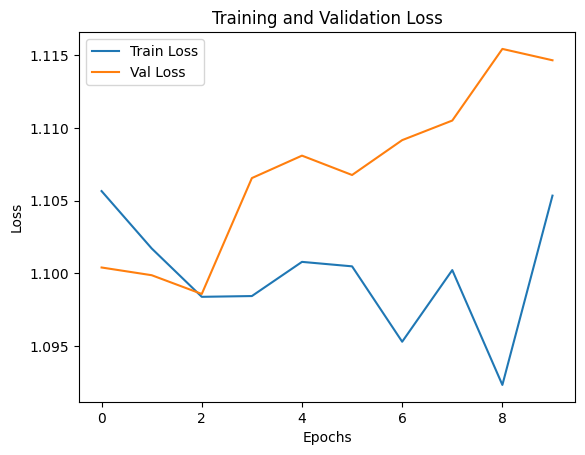

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [30]:
import numpy as np

# Define your labels
label_codes = ["Negative", "Neutral", "Positive"]

# Create mapping from label to integer ID
label_to_id_mapping = {label: i for i, label in enumerate(label_codes)}

print("Sentiment to ID Mapping:", label_to_id_mapping)


Sentiment to ID Mapping: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [31]:
# Convert LABEL_X format to actual text sentiment
label_text_map = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}
sentiment_texts = [label_text_map[l] for l in true_labels]

# Convert to numeric IDs
y_int = np.array([label_to_id_mapping[label] for label in sentiment_texts])

print("Example numeric labels:", y_int[:10])
print("Shape:", y_int.shape)


Example numeric labels: [2 0 1 2 0 1 2 0 1 2]
Shape: (96,)


In [32]:
num_classes = len(label_codes)
y_one_hot = np.eye(num_classes)[y_int]

print("Shape of one-hot encoded labels:", y_one_hot.shape)
print("Example one-hot vectors:\n", y_one_hot[:5])


Shape of one-hot encoded labels: (96, 3)
Example one-hot vectors:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


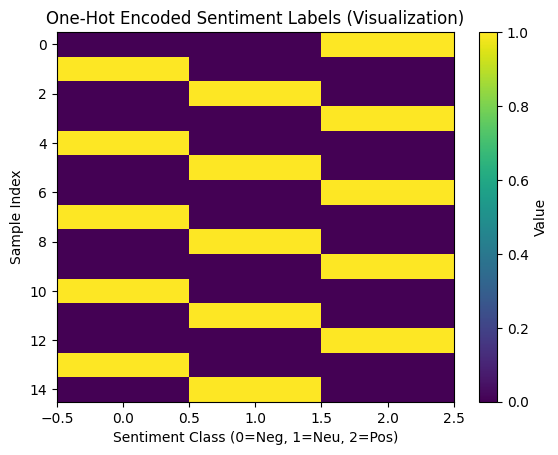

In [33]:
import matplotlib.pyplot as plt

plt.imshow(y_one_hot[:15], cmap='viridis', aspect='auto')
plt.title("One-Hot Encoded Sentiment Labels (Visualization)")
plt.xlabel("Sentiment Class (0=Neg, 1=Neu, 2=Pos)")
plt.ylabel("Sample Index")
plt.colorbar(label="Value")
plt.show()


In [34]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Function to randomly drop or replace words (simple augmentation)
def augment_text_sequences(sequences, vocab_size, drop_prob=0.1, replace_prob=0.05):
    augmented = []
    for seq in sequences:
        new_seq = []
        for token in seq:
            if np.random.rand() < drop_prob:
                continue  # drop word
            elif np.random.rand() < replace_prob:
                new_seq.append(np.random.randint(1, vocab_size))  # random replacement
            else:
                new_seq.append(token)
        augmented.append(new_seq)
    return pad_sequences(augmented, maxlen=20, padding='post', truncating='post')

# Apply augmentation on training data
augmented_X_train = augment_text_sequences(X_train, vocab_size=5000)


In [46]:
# Convert to regular Python types (not NumPy)
class_weights = {int(k): float(v) for k, v in class_weights.items()}
print("Cleaned Class Weights:", class_weights)



Cleaned Class Weights: {0: 1.1014492753623188, 1: 0.9047619047619048, 2: 1.0133333333333334}


In [47]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [48]:
history = model.fit(
    augmented_X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=8,
    class_weight=class_weights,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3547 - loss: 1.0955 - val_accuracy: 0.4500 - val_loss: 1.0932 - learning_rate: 1.0000e-06
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3628 - loss: 1.0996 - val_accuracy: 0.4500 - val_loss: 1.0932 - learning_rate: 1.0000e-06
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2678 - loss: 1.0933 - val_accuracy: 0.4500 - val_loss: 1.0932 - learning_rate: 1.0000e-06
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3793 - loss: 1.1042 - val_accuracy: 0.4500 - val_loss: 1.0932 - learning_rate: 1.0000e-06


In [49]:
def text_data_generator(X, y, batch_size=8):
    while True:
        for i in range(0, len(X), batch_size):
            yield X[i:i+batch_size], y[i:i+batch_size]

train_generator = text_data_generator(augmented_X_train, y_train)
val_generator = text_data_generator(X_test, y_test)


In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt


In [52]:
def text_data_generator(X, y, batch_size=8, augment=False, vocab_size=5000):
    while True:
        idx = np.random.permutation(len(X))
        X, y = X[idx], y[idx]

        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            if augment:
                X_batch_aug = []
                for seq in X_batch:
                    new_seq = []
                    for token in seq:
                        r = np.random.rand()
                        if r < 0.05:  # 5% chance to drop a word
                            continue
                        elif r < 0.10:  # 5% chance to replace a word
                            new_seq.append(np.random.randint(1, vocab_size))
                        else:
                            new_seq.append(token)
                    X_batch_aug.append(new_seq)
                X_batch = pad_sequences(X_batch_aug, maxlen=20, padding='post')

            yield X_batch, y_batch


In [53]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [54]:
batch_size = 8
num_epochs = 10

train_generator = text_data_generator(X_train, y_train, batch_size=batch_size, augment=True)
val_generator = text_data_generator(X_test, y_test, batch_size=batch_size, augment=False)


In [57]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(X_train)//8,       # Adjust batch size if needed
    validation_steps=len(X_test)//8,
    epochs=10,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2663 - loss: 1.1051 - val_accuracy: 0.3125 - val_loss: 1.1000 - learning_rate: 1.0000e-06
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3166 - loss: 1.1019 - val_accuracy: 0.3125 - val_loss: 1.1000 - learning_rate: 1.0000e-06
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.2403 - loss: 1.1042 - val_accuracy: 0.3125 - val_loss: 1.1000 - learning_rate: 1.0000e-06
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3475 - loss: 1.1037 - val_accuracy: 0.3125 - val_loss: 1.1000 - learning_rate: 1.0000e-06
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3267 - loss: 1.1041 - val_accuracy: 0.3125 - val_loss: 1.1000 - learning_rate: 1.0000e-06
